In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
from scipy.linalg import svd, diagsvd

c:\Users\Pedro Antônio Silva\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('ratings_small.csv')
df = df.loc[:, df.columns != 'timestamp']

df_ = pd.pivot_table(data = df, index = 'userId', columns ='movieId', values = 'rating',aggfunc='mean')
df_ = (df_.fillna(0)).to_numpy()
df_.shape

(671, 9066)

In [16]:
def randomiza_item_matriz(A):
    B = copy.deepcopy(A)
    while True:
        r_i = random.randint(0,len(A)-1)
        r_j = random.randint(0,len(A[r_i])-1)
        if (A[r_i][r_j])!=0:
            r_v = random.randint(0,10)
            B[r_i,r_j] = r_v
            return B, (r_i,r_j)


In [10]:
def estima_valor(X, s, Y):
    s[200:] *= 0 # VALOR DE K
    S = X @ diagsvd(s, df_.shape[0], df_.shape[1]) @ Y
    return S

In [7]:
U,s,vt = np.linalg.svd(df_)

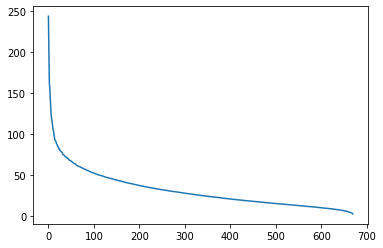

In [8]:
plt.figure()
plt.plot(s[1:])
plt.show()

In [19]:
B, pos = randomiza_item_matriz(df_)
X, s, Y = np.linalg.svd(B)
S = estima_valor(X,s,Y)

print(df_[pos],B[pos],abs(S[pos]))

3.5 9.0 5.38327440281093


In [20]:
erros = []
for i in range(1000):
    B, pos = randomiza_item_matriz(df_)
    X, s, Y = np.linalg.svd(B)
    S = estima_valor(X,s,Y)

    erro = df_[pos] - S[pos]
    erros.append(erro)
erros = pd.DataFrame(erros)
erros.to_csv('erros.csv', index=False)